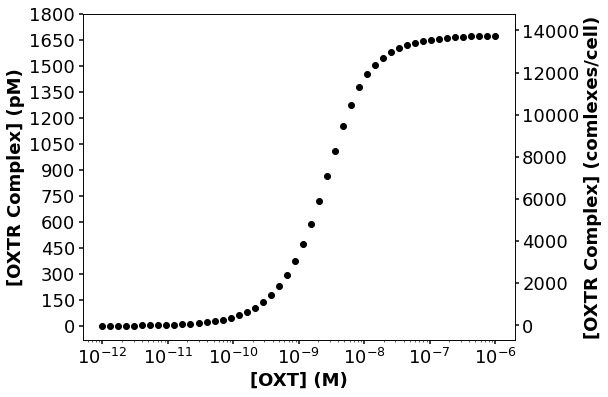

In [3]:
# first thing first, let's inmport the python packages here

import numpy as np   # for numbers and data
from scipy.integrate import odeint # for integration of ode
import matplotlib.pyplot as plt # for datavisualization or creating plots



# This is the function for ode equation where oxt set to be variable
def senana_mod(z, t, oxt):
    oxtr,oxr = z
    doxtrdt = (-kon*oxt*oxtr + koff*oxr)
    doxrdt = (kon*oxt*oxtr -koff*oxr)

    return[doxtrdt,doxrdt] # it will return oxtr conc. and oxr conc. over time


# Set the initial conditions and parameters
#oxt0 = 1e-9 # 10 nano molar
oxtr0 = 1.678e-9 # 3 nano molar
oxr0 = 0
z0 = [oxtr0, oxr0]
ts = np.linspace(0, 600, 1000) # time in minutes
koff = 0.0011 # per minute
kon = 6.8e+5

# Volume and avagadro's number 
Av = 6e+23
V = 1.4e-11 # litre It is given as 14047 cubic micro meter  for myometrial cells
Div = V*Av
# Define the range of oxt values to plot
start_value = 1e-12
stop_value = 1e-6
num_steps = 50

# Use np.logspace to create an array with 7 equal steps in log space
oxt_values = np.logspace(np.log10(start_value), np.log10(stop_value), num=num_steps)


fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(16)
fig.subplots_adjust(right=0.5)
ax2 = ax1.twinx() # create a second Y-axis
ax1.set_xlabel('[OXT] (M)', fontsize=18, fontweight='bold')
ax1.set_ylabel('[OXTR Complex] (pM)', fontsize=18, fontweight='bold')
ax2.set_ylabel('[OXTR Complex] (comlexes/cell)', fontsize=18, fontweight='bold')

#ax2.tick_params(axis='both',  **tkw2)
#plt.grid()
for oxt in oxt_values:
    sol = odeint(senana_mod, z0, ts, args=(oxt, ))
    oxr = sol[:, 1]
    oxr_c = oxr*Div# LR complex concentration
    ax1.plot(oxt, oxr[-1]/1e-12, 'ko') # plot the Kd values at t=600
    ax2.plot(oxt, oxr_c[-1], 'k-') # 


tkw2 = dict(size=4, width=1.5, labelsize=18)
ax1.tick_params(axis='both',  **tkw2)
ax2.tick_params(axis='both',  **tkw2)
#ax1.set_xlim(-13, -5)
ax1.set_xscale('log')
# insettwin1.set_ylim(0, 60.48)
# inset1_ax.set_xticks(np.arange(0,60*36,500))
ax1.set_xticks([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6])

#ax1.set_yticks([0,200,400,600,800,1000,1200, 1400, 1600, 1800])
ax1.set_yticks(np.arange(0, 1805, 150))

plt.savefig("oxt_dose_response_curve_myo", dpi=400, bbox_inches='tight', format="jpg")   

plt.show()
